<a href="https://colab.research.google.com/github/Firepower12/Abdul_miscellaneous/blob/main/S%26P_500_industries_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyse the impact of macroeconomic variables on how well industries that make up the S&P500 index perform 

Student ID: 2300354, 2308643, 2303246

In [ ]:
#importing all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#install the FRED Api (federal website for economic data)
!pip install fredapi
import json
import matplotlib.pyplot as plt
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import fredapi as fa

In [ ]:
#connect to the Api using my key
api_key1 = 'b11137106c99122790492fa6936be007'
fred = fa.Fred(api_key=api_key1)
#get the fred series monthly data for the period 2001 - 2019, for each economic indicator
interest_data = fred.get_series('FEDFUNDS', observation_start= '02/01/2001', observation_end= '31/12/2019')
housing_index = fred.get_series('CSUSHPISA', observation_start= '02/01/2001', observation_end= '31/12/2019')
inflation = fred.get_series('MEDCPIM158SFRBCLE', observation_start= '02/01/2001', observation_end= '31/12/2019')
unemployment = fred.get_series('UNRATE', observation_start= '02/01/2001', observation_end= '31/12/2019')
#get the fred series monthly data for the period 2020 - 2023, as our test data
interest_data1 = fred.get_series('FEDFUNDS', observation_start= '01/01/2020', observation_end= '01/01/2023')
housing_index1 = fred.get_series('CSUSHPISA', observation_start= '01/01/2020', observation_end= '01/01/2023')
inflation1 = fred.get_series('MEDCPIM158SFRBCLE', observation_start= '01/01/2020', observation_end= '01/01/2023')
unemployment1 = fred.get_series('UNRATE', observation_start= '01/01/2020', observation_end= '01/01/2023')

/usr/local/lib/python3.9/dist-packages/fredapi/fred.py:127: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  observation_end = pd.to_datetime(observation_end, errors='raise')
/usr/local/lib/python3.9/dist-packages/fredapi/fred.py:127: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  observation_end = pd.to_datetime(observation_end, errors='raise')
/usr/local/lib/python3.9/dist-packages/fredapi/fred.py:127: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  observation_end = pd.to_datetime(observation_end, errors='raise')
/usr/local/lib/python3.9/dist-packages/fredapi

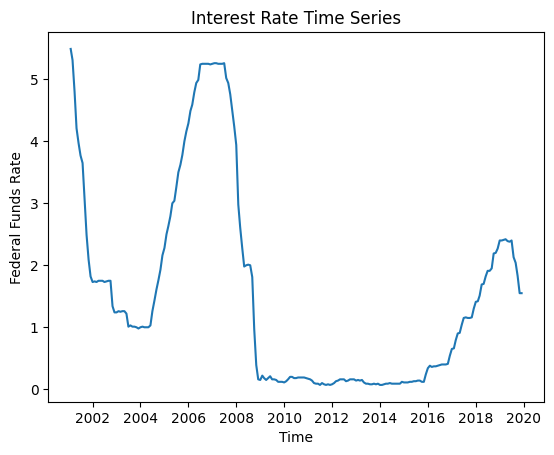

In [ ]:
#creating a plot for interest rate
plt.plot(interest_data)
plt.xlabel('Time')
plt.ylabel('Federal Funds Rate')
plt.title('Interest Rate Time Series')
plt.show()


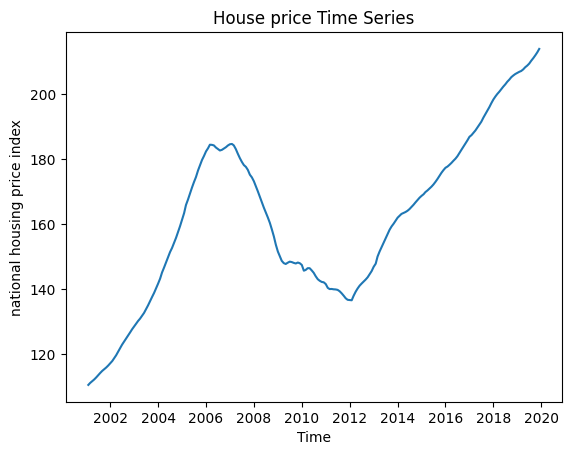

In [ ]:
#creating a plot for housing index
plt.plot(housing_index)
plt.xlabel('Time')
plt.ylabel('national housing price index')
plt.title('House price Time Series')
plt.show()



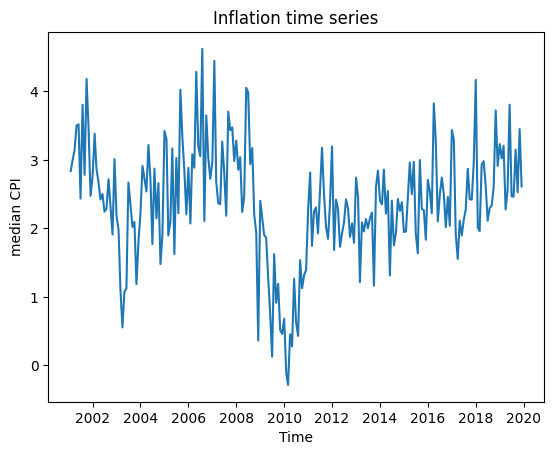

In [ ]:
#creating a plot for inflation
plt.plot(inflation)
plt.xlabel('Time')
plt.ylabel('median CPI')
plt.title('Inflation time series')
plt.show()



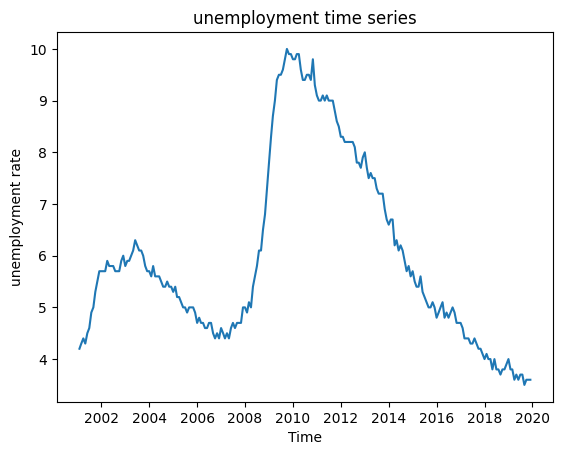

In [ ]:
#plotting unemployment
plt.plot(unemployment)
plt.xlabel('Time')
plt.ylabel('unemployment rate')
plt.title('unemployment time series')
plt.show()

In [ ]:
#import modules for data analysis, and yfinance for financial data
import pandas as pd
import yfinance as yf

#contained is a list of the s&p500 companies and the industries and sectors they belong to
sp500url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500url)

data_table[0]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [ ]:
#retrieve the yfinance tickers for the above companies
tickers = data_table[0]['Symbol'].tolist()
tickers

In [ ]:
#retrieve stock price data for the s&p500 companies in the specified time frame
testperiod = yf.download(tickers, '2001-01-01', '2019-12-31', interval = '1mo')['Adj Close'] 

[*********************100%***********************]  503 of 503 completed

7 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted
- CEG: Data doesn't exist for startDate = 978325200, endDate = 1577768400
- OGN: Data doesn't exist for startDate = 978325200, endDate = 1577768400
- OTIS: Data doesn't exist for startDate = 978325200, endDate = 1577768400
- CARR: Data doesn't exist for startDate = 978325200, endDate = 1577768400
- GEHC: Data doesn't exist for startDate = 978325200, endDate = 1577768400


In [ ]:
testperiod

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,33.282852,NaN,NaN,0.328669,NaN,9.186118,11.976141,1.715278,NaN,21.702559,...,NaN,10.318446,20.839052,10.000676,NaN,4.605026,NaN,24.750000,38.692448,NaN
2001-02-01,21.964846,NaN,NaN,0.277373,NaN,10.317340,13.136089,1.777778,NaN,14.440551,...,NaN,11.424426,20.071365,10.886813,NaN,4.922083,NaN,20.027779,39.774452,NaN
2001-03-01,18.749437,NaN,NaN,0.335432,NaN,9.420431,12.653439,1.763889,NaN,17.375868,...,NaN,12.198210,20.164165,10.561292,NaN,4.882450,NaN,16.944445,36.197449,NaN
2001-04-01,23.801352,NaN,NaN,0.387411,NaN,10.371114,12.436248,1.761111,NaN,22.328724,...,NaN,12.805031,22.056122,11.359599,NaN,5.730073,NaN,19.226667,37.031319,NaN
2001-05-01,20.463923,NaN,NaN,0.303211,NaN,11.083645,13.998536,1.861111,NaN,19.768778,...,NaN,12.435657,22.093452,12.768668,NaN,5.842578,NaN,20.013332,37.621990,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,69.290619,26.036852,128.396225,50.701092,55.349079,77.657021,80.260902,39.500000,187.743408,284.510010,...,107.290352,57.990631,55.652081,50.191074,73.259888,109.188026,131.418640,205.029999,36.726250,123.386116
2019-09-01,74.669380,26.783880,153.945145,54.607029,63.751640,78.076942,78.708733,41.980000,182.229614,276.250000,...,106.922333,58.595638,58.096577,51.307487,76.385063,106.439873,129.596558,206.369995,40.122776,121.600037
2019-10-01,73.970711,29.852554,151.286392,60.651165,66.976257,80.969376,78.652290,41.759998,175.664215,277.929993,...,119.333656,57.719093,55.595318,52.821545,73.574104,95.442108,130.732147,237.869995,43.682632,124.850151


In [ ]:
#dropping NAs
df=testperiod.dropna(axis=1, how='any')
df = pd.DataFrame(df)
df

,A,AAPL,ABC,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,...,WMT,WRB,WST,WY,XEL,XOM,XRAY,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,33.282852,0.328669,9.186118,11.976141,1.715278,21.702559,40.232716,8.768675,29.369694,8.964434,...,37.616810,2.205469,4.472615,9.178524,10.318446,20.839052,10.000676,4.605026,24.750000,38.692448
2001-02-01,21.964846,0.277373,10.317340,13.136089,1.777778,14.440551,23.972525,8.868817,28.947756,9.290011,...,33.172981,2.689883,4.678913,9.468102,11.424426,20.071365,10.886813,4.922083,20.027779,39.774452
2001-03-01,18.749437,0.335432,9.420431,12.653439,1.763889,17.375868,23.291264,7.749164,26.680983,7.447238,...,33.444519,2.839543,4.352693,8.948359,12.198210,20.164165,10.561292,4.882450,16.944445,36.197449
2001-04-01,23.801352,0.387411,10.371114,12.436248,1.761111,22.328724,30.405886,7.018445,26.663958,8.494422,...,34.315887,2.560580,5.135620,9.959650,12.805031,22.056122,11.359599,5.730073,19.226667,37.031319
2001-05-01,20.463923,0.303211,11.083645,13.998536,1.861111,19.768778,28.632065,7.955417,26.413282,7.457083,...,34.322521,2.748894,5.053068,10.079457,12.435657,22.093452,12.768668,5.842578,20.013332,37.621990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,69.290619,50.701092,77.657021,80.260902,39.500000,284.510010,102.396049,34.463375,157.139435,142.820007,...,107.454826,44.281715,144.098160,22.347532,57.990631,55.652081,50.191074,109.188026,205.029999,36.726250
2019-09-01,74.669380,54.607029,78.076942,78.708733,41.980000,276.250000,104.690758,37.549362,149.349060,147.699997,...,112.160965,44.890789,140.492264,23.528193,58.595638,58.096577,51.307487,106.439873,206.369995,40.122776
2019-10-01,73.970711,60.651165,80.969376,78.652290,41.759998,277.929993,99.912048,38.436195,150.837997,147.360001,...,110.818977,43.509155,142.493362,25.131765,57.719093,55.595318,52.821545,95.442108,237.869995,43.682632


In [ ]:
#check the number of NAs
print(df.isnull().sum())

A       0
AAPL    0
ABC     0
ABT     0
ACGL    0
       ..
XOM     0
XRAY    0
YUM     0
ZBRA    0
ZION    0
Length: 374, dtype: int64


In [ ]:
#making cumulative returns
percentreturns = df.pct_change()
cumulative_returns = 100*((1 + percentreturns).cumprod() - 1)
cumulative_returns

,A,AAPL,ABC,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,...,WMT,WRB,WST,WY,XEL,XOM,XRAY,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-01,-34.005519,-15.606960,12.314470,9.685493,3.643724,-33.461528,-40.415345,1.142048,-1.436644,3.631883,...,-11.813412,21.964244,4.612466,3.154956,10.718474,-3.683886,8.860771,6.885034,-19.079682,2.796423
2001-03-01,-43.666374,2.057699,2.550729,5.655391,2.833997,-19.936316,-42.108647,-11.626742,-9.154713,-16.924613,...,-11.091559,28.750065,-2.681264,-2.507652,18.217507,-3.238567,5.605776,6.024371,-31.537597,-6.448284
2001-04-01,-28.487645,17.872860,12.899852,3.841862,2.672044,2.885215,-24.424973,-19.960032,-9.212681,-5.243072,...,-8.775126,16.101367,14.823640,8.510366,24.098441,5.840331,13.588311,24.430866,-22.316495,-4.293161
2001-05-01,-38.515118,-7.745742,20.656459,16.886868,8.502005,-8.910381,-28.833875,-9.274585,-10.066197,-16.814787,...,-8.757491,24.639878,12.977920,9.815666,20.518694,6.019469,27.678049,26.873947,-19.138051,-2.766580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,108.187143,15326.200995,745.373633,570.173327,2202.833670,1210.951469,154.509416,293.028316,435.039405,1493.184942,...,185.656404,1907.814099,3121.787522,143.476317,462.009339,167.056678,401.876809,2271.062225,728.404035,-5.081607
2019-09-01,124.347901,16514.612726,749.944899,557.212810,2347.416618,1172.891396,160.213004,328.221628,408.514189,1547.622174,...,198.167137,1935.430614,3041.165877,156.339608,467.872695,178.787040,413.040185,2211.384954,733.818162,3.696660
2019-10-01,122.248713,18353.588067,781.431901,556.741521,2334.590638,1180.632385,148.335333,338.335279,413.583828,1543.829449,...,194.599616,1872.784808,3085.907008,173.810531,459.377763,166.784292,428.179733,1972.564041,861.090889,12.897051


In [ ]:
#group the stocks by sector
sp500_df = data_table[0]
grouped_stocks = sp500_df.groupby('GICS Sector')
for sector, group in grouped_stocks:
    print(f"Sector: {sector}")
    print(group)
    print("\n")

Sector: Communication Services
    Symbol                              Security             GICS Sector  \
5     ATVI                   Activision Blizzard  Communication Services   
22   GOOGL               Alphabet Inc. (Class A)  Communication Services   
23    GOOG               Alphabet Inc. (Class C)  Communication Services   
51       T                                  AT&T  Communication Services   
104   CHTR                Charter Communications  Communication Services   
121  CMCSA                               Comcast  Communication Services   
151   DISH                          Dish Network  Communication Services   
152    DIS                                Disney  Communication Services   
169     EA                       Electronic Arts  Communication Services   
209   FOXA             Fox Corporation (Class A)  Communication Services   
210    FOX             Fox Corporation (Class B)  Communication Services   
259    IPG  Interpublic Group of Companies (The)  Communi

In [ ]:
#turn those grouped sectors into dictionaries
symbol_strings = {}

for sector, group in grouped_stocks:
    symbol_strings[sector] = ', '.join(group['Symbol'].tolist())    

In [ ]:
#examing industries
symbol_strings

{'Communication Services': 'ATVI, GOOGL, GOOG, T, CHTR, CMCSA, DISH, DIS, EA, FOXA, FOX, IPG, LYV, MTCH, META, NFLX, NWSA, NWS, OMC, PARA, TMUS, TTWO, VZ, WBD',
 'Consumer Discretionary': 'AAP, AMZN, APTV, AZO, BBWI, BBY, BKNG, BWA, CZR, KMX, CCL, CMG, DHI, DRI, DPZ, EBAY, ETSY, EXPE, F, GRMN, GM, GPC, HAS, HLT, HD, LVS, LEN, LKQ, LOW, MAR, MCD, MGM, MHK, NWL, NKE, NCLH, NVR, ORLY, POOL, PHM, RL, ROST, RCL, SBUX, TPR, TSLA, TJX, TSCO, ULTA, VFC, WHR, WYNN, YUM',
 'Consumer Staples': 'ADM, MO, BF.B, BG, CPB, CHD, CLX, KO, CL, CAG, STZ, COST, DG, DLTR, EL, GIS, HSY, HRL, K, KDP, KMB, KHC, KR, LW, MKC, TAP, MDLZ, MNST, PEP, PM, PG, SJM, SYY, TGT, TSN, WBA, WMT',
 'Energy': 'APA, BKR, CVX, COP, CTRA, DVN, FANG, EOG, EQT, XOM, HAL, HES, KMI, MRO, MPC, OXY, OKE, PSX, PXD, SLB, TRGP, VLO, WMB',
 'Financials': 'AFL, ALL, AXP, AIG, AMP, AON, ACGL, AJG, AIZ, BAC, WRB, BRK.B, BLK, BK, BRO, COF, CBOE, SCHW, CB, CINF, C, CFG, CME, CMA, DFS, RE, FDS, FITB, FRC, FIS, FISV, FLT, BEN, GL, GPN, GS, HIG,

In [ ]:
#test the dictionary works
print(symbol_strings['Industrials'])

MMM, AOS, ADP, ALK, ALLE, AAL, AME, BA, BR, CHRW, CARR, CAT, CTAS, CPRT, CSGP, CSX, CMI, DE, DAL, DOV, ETN, EMR, EFX, EXPD, FAST, FDX, FTV, GNRC, GD, GE, HON, HWM, HII, IEX, ITW, IR, JBHT, J, JCI, LHX, LDOS, LMT, MAS, NDSN, NSC, NOC, ODFL, OTIS, PCAR, PH, PAYX, PNR, PWR, RTX, RSG, RHI, ROK, ROL, SNA, LUV, SWK, TXT, TT, TDG, UNP, UAL, UPS, URI, VRSK, WAB, WM, GWW, XYL


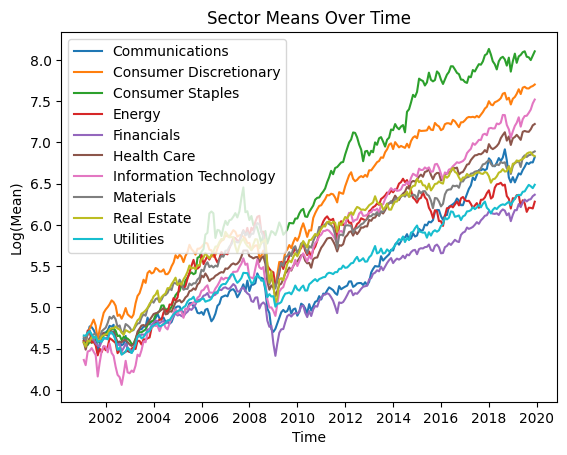

In [ ]:
# make a function to delimit the dictionary using commas to make it easier to process, and get the cumulative returns for the stock
def process_sectors(symbol_strings, cumulative_returns):
    sector_dataframes = {}
    
    for sector, symbols_str in symbol_strings.items():
        symbols_list = symbols_str.split(', ')
        filtered_symbols = list(set(symbols_list).intersection(cumulative_returns.columns))
        
        sector_df = cumulative_returns[filtered_symbols].copy()
        sector_df = sector_df.iloc[1:].copy()
        
        sector_dataframes[sector] = sector_df
    
    return sector_dataframes
sector_dataframes = process_sectors(symbol_strings, cumulative_returns)

#making data frame for each industry  
Communication_df = sector_dataframes['Communication Services']
Consumer_Discretionary_df = sector_dataframes['Consumer Discretionary']
Consumer_Staples_df = sector_dataframes['Consumer Staples']
Energy_df = sector_dataframes['Energy']
Financials_df = sector_dataframes['Financials']
Health_Care_df = sector_dataframes['Health Care']
Information_Technology_df = sector_dataframes['Information Technology']
Materials_df = sector_dataframes['Materials']
Real_Estate_df = sector_dataframes['Real Estate']
Utilities_df = sector_dataframes['Utilities']



#convert these to a single dataframe
dataframes = [Communication_df, Consumer_Discretionary_df, Consumer_Staples_df, Energy_df, Financials_df, Health_Care_df, Information_Technology_df, Materials_df, Real_Estate_df, Utilities_df]

#adding a constant of 100 to each variable to start the data at 100%. As you cannot log negative values
c = 100
means = []

for df in dataframes:
    mean = df.mean(axis=1)
    mean_with_c = mean + c
    means.append(mean_with_c)

means1, means2, means3, means4, means5, means6, means7, means8, means9, means10 = means





#making logs

means1 = means1.apply(np.log)
means2 = means2.apply(np.log)
means3 = means3.apply(np.log)
means4 = means4.apply(np.log)
means5 = means5.apply(np.log)
means6 = means6.apply(np.log)
means7 = means7.apply(np.log)
means8 = means8.apply(np.log)
means9 = means9.apply(np.log)
means10 = means10.apply(np.log)


#plot the industries
plt.plot(means1, label="Communications")
plt.plot(means2, label="Consumer Discretionary")
plt.plot(means3, label="Consumer Staples")
plt.plot(means4, label="Energy")
plt.plot(means5, label="Financials")
plt.plot(means6, label="Health Care")
plt.plot(means7, label="Information Technology")
plt.plot(means8, label="Materials")
plt.plot(means9, label="Real Estate")
plt.plot(means10, label="Utilities")

# Customize the plot
plt.xlabel("Time")
plt.ylabel("Log(Mean)")

plt.title("Sector Means Over Time")
plt.legend()

# Show the plot
plt.show()

In [ ]:
#prepare the exogeneous variable by combining the economic indicators
X = sm.add_constant(pd.concat([interest_data, inflation, unemployment, housing_index], axis=1))
means = [Communication_df.mean(axis=1), Consumer_Discretionary_df.mean(axis=1), Consumer_Staples_df.mean(axis=1),
         Energy_df.mean(axis=1), Financials_df.mean(axis=1), Health_Care_df.mean(axis=1),
         Information_Technology_df.mean(axis=1), Materials_df.mean(axis=1), Real_Estate_df.mean(axis=1),
         Utilities_df.mean(axis=1)]

In [ ]:
# Create a list of Y variables
Y = ([means1, means2, means3, means4, means5, means6, means7, means8, means9, means10])
coefficients = []
# Run regressions
for i, y in enumerate(Y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    coef_dict = {"Regression": i+1}
    for j, coef in enumerate(results.params):
        coef_dict[f"Coefficient{j+1}"] = coef
    coefficients.append(coef_dict) 
    print(f"Regression {i+1} summary:")
    print(results.summary())  

Regression 1 summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     315.5
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           2.50e-90
Time:                        23:35:32   Log-Likelihood:                -21.416
No. Observations:                 227   AIC:                             52.83
Df Residuals:                     222   BIC:                             69.96
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3516      0.2

In [ ]:
#renaming the columns and rows to create a table
coefficients_df = pd.DataFrame(coefficients)
new_column_names = {"Coefficient1": "Intercept", "Coefficient2": "interest rate", "Coefficient3": "inflation", "Coefficient4": "unemployment", "Coefficient5": "housing index"}
coefficients_df = coefficients_df.rename(columns=new_column_names)
coefficients_df.iloc[0, 0] = 'Communications'
coefficients_df.iloc[1, 0] = 'Consumer Discretionary'
coefficients_df.iloc[2, 0] = 'Consumer Staples'
coefficients_df.iloc[3, 0] = 'Energy'
coefficients_df.iloc[4, 0] = 'Financials'
coefficients_df.iloc[5, 0] = 'Health Care'
coefficients_df.iloc[6, 0] = 'Information Technology'
coefficients_df.iloc[7, 0] =  'Materials'
coefficients_df.iloc[8, 0] = 'Real Estate'
coefficients_df.iloc[9, 0] = 'Utilities'
coefficients_df

,Regression,Intercept,interest rate,inflation,unemployment,housing index
0,Communications,3.351587,-0.249033,0.052017,-0.128391,0.019223
1,Consumer Discretionary,2.064218,-0.333945,0.117646,-0.020852,0.028006
2,Consumer Staples,-0.042583,-0.392002,0.188902,0.054745,0.038879
3,Energy,0.752863,-0.132437,0.155103,0.157912,0.023856
4,Financials,3.111864,-0.149105,0.045886,-0.060058,0.016294
5,Health Care,1.828957,-0.269256,0.103585,-0.012354,0.025985
6,Information Technology,0.853068,-0.318529,0.129948,0.017056,0.030900
7,Materials,1.742624,-0.186900,0.103967,0.058844,0.023297
8,Real Estate,1.589162,-0.188289,0.115300,0.067586,0.023952
9,Utilities,2.475294,-0.172788,0.077918,0.000583,0.018775


Now doing another test during the Covid period

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted


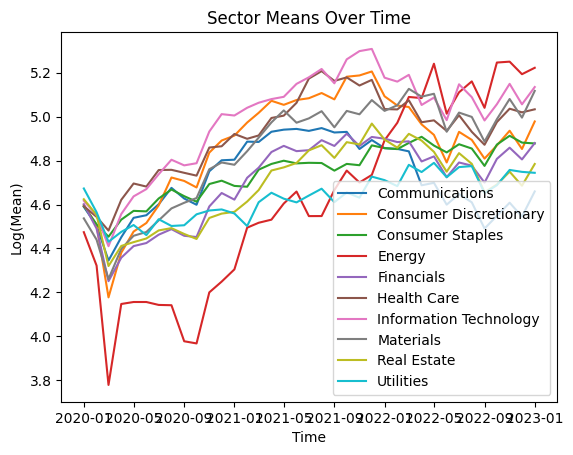

In [ ]:
#tickers for the test period, and clean the data, and get the cumulative returns like above
testperiod= yf.download(tickers, '2019-12-01', '2023-02-01', interval = '1mo')['Adj Close'] 
df=testperiod.dropna(axis=1, how='any')
df = pd.DataFrame(df)
df
percentreturns = df.pct_change()
cumulative_returns = 100*((1 + percentreturns).cumprod() - 1)
cumulative_returns

#process the dictionary for the industries
def process_sectors(symbol_strings, cumulative_returns):
    sector_dataframes = {}
    
    for sector, symbols_str in symbol_strings.items():
        symbols_list = symbols_str.split(', ')
        filtered_symbols = list(set(symbols_list).intersection(cumulative_returns.columns))
        
        sector_df = cumulative_returns[filtered_symbols].copy()
        sector_df = sector_df.iloc[1:].copy()
        
        sector_dataframes[sector] = sector_df
    
    return sector_dataframes
sector_dataframes = process_sectors(symbol_strings, cumulative_returns)

#making data frame for each industry  
Communication_df = sector_dataframes['Communication Services']
Consumer_Discretionary_df = sector_dataframes['Consumer Discretionary']
Consumer_Staples_df = sector_dataframes['Consumer Staples']
Energy_df = sector_dataframes['Energy']
Financials_df = sector_dataframes['Financials']
Health_Care_df = sector_dataframes['Health Care']
Information_Technology_df = sector_dataframes['Information Technology']
Materials_df = sector_dataframes['Materials']
Real_Estate_df = sector_dataframes['Real Estate']
Utilities_df = sector_dataframes['Utilities']

#convert these to a dataframe
dataframes = [Communication_df, Consumer_Discretionary_df, Consumer_Staples_df, Energy_df, Financials_df, Health_Care_df, Information_Technology_df, Materials_df, Real_Estate_df, Utilities_df]

means1, means2, means3, means4, means5, means6, means7, means8, means9, means10 = means

c = 100
means = []

for df in dataframes:
    mean = df.mean(axis=1)
    mean_with_c = mean + c
    means.append(mean_with_c)






#making logs

means1 = means1.apply(np.log)
means2 = means2.apply(np.log)
means3 = means3.apply(np.log)
means4 = means4.apply(np.log)
means5 = means5.apply(np.log)
means6 = means6.apply(np.log)
means7 = means7.apply(np.log)
means8 = means8.apply(np.log)
means9 = means9.apply(np.log)
means10 = means10.apply(np.log)


#plot the industries
plt.plot(means1, label="Communications")
plt.plot(means2, label="Consumer Discretionary")
plt.plot(means3, label="Consumer Staples")
plt.plot(means4, label="Energy")
plt.plot(means5, label="Financials")
plt.plot(means6, label="Health Care")
plt.plot(means7, label="Information Technology")
plt.plot(means8, label="Materials")
plt.plot(means9, label="Real Estate")
plt.plot(means10, label="Utilities")

# Customize the plot
plt.xlabel("Time")
plt.ylabel("Log(Mean)")

plt.title("Sector Means Over Time")
plt.legend()

# Show the plot
plt.show()

In [ ]:
X = sm.add_constant(pd.concat([interest_data1, inflation1, unemployment1, housing_index1], axis=1))
means = [Communication_df.mean(axis=1), Consumer_Discretionary_df.mean(axis=1), Consumer_Staples_df.mean(axis=1),
         Energy_df.mean(axis=1), Financials_df.mean(axis=1), Health_Care_df.mean(axis=1),
         Information_Technology_df.mean(axis=1), Materials_df.mean(axis=1), Real_Estate_df.mean(axis=1),
         Utilities_df.mean(axis=1)]

In [ ]:
# Create a list of Y variables
Y= ([means1, means2, means3, means4, means5, means6, means7, means8, means9, means10])
coefficients = []
# Run regressions
for i, y in enumerate(Y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    coef_dict = {"Regression": i+1}
    for j, coef in enumerate(results.params):
        coef_dict[f"Coefficient{j+1}"] = coef
    coefficients.append(coef_dict) 
    print(f"Regression {i+1} summary:")
    print(results.summary())

In [ ]:
#renaming columns and rows
coefficients_df = pd.DataFrame(coefficients)
new_column_names = {"Coefficient1": "Intercept", "Coefficient2": "interest rate", "Coefficient3": "inflation", "Coefficient4": "unemployment", "Coefficient5": "housing index"}
coefficients_df = coefficients_df.rename(columns=new_column_names)
coefficients_df.iloc[0, 0] = 'Communications'
coefficients_df.iloc[1, 0] = 'Consumer Discretionary'
coefficients_df.iloc[2, 0] = 'Consumer Staples'
coefficients_df.iloc[3, 0] = 'Energy'
coefficients_df.iloc[4, 0] = 'Financials'
coefficients_df.iloc[5, 0] = 'Health Care'
coefficients_df.iloc[6, 0] = 'Information Technology'
coefficients_df.iloc[7, 0] =  'Materials'
coefficients_df.iloc[8, 0] = 'Real Estate'
coefficients_df.iloc[9, 0] = 'Utilities'
coefficients_df

,Regression,Intercept,interest rate,inflation,unemployment,housing index
0,Communications,4.006288,-0.094204,-0.038239,-0.018762,0.004083
1,Consumer Discretionary,3.215083,-0.084783,-0.049056,-0.022764,0.007936
2,Consumer Staples,3.539003,-0.004306,-0.023075,0.000089,0.005040
3,Energy,1.791704,0.061865,0.010461,0.000820,0.010473
4,Financials,3.537834,-0.037732,-0.019325,-0.018353,0.005331
5,Health Care,3.316279,-0.053214,-0.030100,-0.002245,0.006876
6,Information Technology,3.069587,-0.062070,-0.042489,-0.010464,0.008502
7,Materials,2.708186,-0.037255,-0.046839,-0.012023,0.009387
8,Real Estate,3.788676,-0.060174,0.003900,-0.018672,0.003971
9,Utilities,4.081130,0.004027,-0.001375,-0.007554,0.002288
